In [19]:
from google.colab import drive
import json
import pandas as pd

In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd


'/content'

In [21]:
json_path='/content/drive/MyDrive/review-Washington_10.json'

Printing first three JSON lines

In [23]:
with open(json_path,'r',encoding='utf-8') as f:
  for _ in range(3):
    print(f.readline().rstrip())


{"user_id": "103093043835388050629", "name": "Casper Steele", "time": 1626907411534, "rating": 2, "text": "Drivers say security has bathroom key. Security says they aren't 'allowed' to unlock the bathroom. How do you expect people to behave according to health and safety regulations when you can't provide the basic public business necessities.", "pics": null, "resp": null, "gmap_id": "0x5495ae7d3bf7d097:0xbcbc06152a3ccebc"}
{"user_id": "111014066796803341223", "name": "Judy Maes", "time": 1613028426989, "rating": 5, "text": "It's a CTRAN transit center with schedules to look at and sanitation cleaning of buses before reboarding.", "pics": null, "resp": null, "gmap_id": "0x5495ae7d3bf7d097:0xbcbc06152a3ccebc"}
{"user_id": "111724423355988809570", "name": "Daniel Hernandez", "time": 1536710665852, "rating": 5, "text": "Neat little Transit Center with lots of schedules for C-Tran and Express lines. You will almost never have to wait more than 30 minutes for a bus that will take you to you

Printing last three JSON lines

In [22]:
from collections import deque

with open(json_path,'r',encoding='utf-8') as f:
  last_3=deque(f,maxlen=3)
for line in last_3:
  print(line.rstrip())

{"user_id": "106769570059000033926", "name": "Imran Aslam", "time": 1529132134824, "rating": 5, "text": null, "pics": null, "resp": null, "gmap_id": "0x54906c4bb4541b15:0x167db6becb362e15"}
{"user_id": "101099994640606261545", "name": "ahmed alsalihi", "time": 1563403471882, "rating": 5, "text": null, "pics": null, "resp": null, "gmap_id": "0x54906c4bb4541b15:0x167db6becb362e15"}
{"user_id": "105185672996234882794", "name": "mohammed koya", "time": 1519875458049, "rating": 5, "text": null, "pics": null, "resp": null, "gmap_id": "0x54906c4bb4541b15:0x167db6becb362e15"}


All text is null in last 3

In [24]:
line_count=0
with open(json_path,'r',encoding='utf-8') as f:
  for _ in f:
   line_count+=1
print("No on JSON lines: ",line_count)


No on JSON lines:  10192020


In [25]:
meta_path='/content/drive/MyDrive/meta-Washington.json'

In [27]:
with open(meta_path,'r',encoding='utf-8') as m:
  for _ in range(3):
    print(m.readline().rstrip())

{"name": "Vancouver (99th St Station)", "address": "Vancouver (99th St Station), Vancouver, WA 98665", "gmap_id": "0x5495ae7d3bf7d097:0xbcbc06152a3ccebc", "description": null, "latitude": 45.6906933, "longitude": -122.66373349999999, "category": ["Bus station"], "avg_rating": 3.6, "num_of_reviews": 28, "price": null, "hours": null, "MISC": {"Accessibility": ["Passenger loading area", "Wheelchair accessible entrance"]}, "state": null, "relative_results": ["0x5495a4bd41784269:0xb04d0997ebbbf7c1", "0x5495ae8127051955:0x856ca9220a584d1a", "0x5495ae8b0e21f267:0xe7db6bb4f87a789c", "0x5495aeed4155630f:0x9c8310b516103bc4", "0x5495ae62139ee88d:0x1d4a20239e0a783b"], "url": "https://www.google.com/maps/place//data=!4m2!3m1!1s0x5495ae7d3bf7d097:0xbcbc06152a3ccebc?authuser=-1&hl=en&gl=us"}
{"name": "Green Mountain Mobile Ranch", "address": "Green Mountain Mobile Ranch, 21209 NE 58th St, Vancouver, WA 98682", "gmap_id": "0x5495ba6a9677196b:0xa46cbab362492a85", "description": null, "latitude": 45.663

In [28]:
with open(meta_path,'r',encoding='utf-8') as m:
  for _ in range(41423,41427):
    print(m.readline().rstrip())

{"name": "Vancouver (99th St Station)", "address": "Vancouver (99th St Station), Vancouver, WA 98665", "gmap_id": "0x5495ae7d3bf7d097:0xbcbc06152a3ccebc", "description": null, "latitude": 45.6906933, "longitude": -122.66373349999999, "category": ["Bus station"], "avg_rating": 3.6, "num_of_reviews": 28, "price": null, "hours": null, "MISC": {"Accessibility": ["Passenger loading area", "Wheelchair accessible entrance"]}, "state": null, "relative_results": ["0x5495a4bd41784269:0xb04d0997ebbbf7c1", "0x5495ae8127051955:0x856ca9220a584d1a", "0x5495ae8b0e21f267:0xe7db6bb4f87a789c", "0x5495aeed4155630f:0x9c8310b516103bc4", "0x5495ae62139ee88d:0x1d4a20239e0a783b"], "url": "https://www.google.com/maps/place//data=!4m2!3m1!1s0x5495ae7d3bf7d097:0xbcbc06152a3ccebc?authuser=-1&hl=en&gl=us"}
{"name": "Green Mountain Mobile Ranch", "address": "Green Mountain Mobile Ranch, 21209 NE 58th St, Vancouver, WA 98682", "gmap_id": "0x5495ba6a9677196b:0xa46cbab362492a85", "description": null, "latitude": 45.663

Convert to dataframes to do better EDA. DO NOT USE Json.loads as it loads the entire file into Python list of dicts before pandas can use it and gives rise to lot of overhead and RAM crash

In [29]:
!pip -q install duckdb pyarrow
import duckdb

In [30]:
import os

In [31]:
out_dir        = "/content/drive/MyDrive/washington"          # make sure this exists
reviews_parquet = os.path.join(out_dir, "reviews.parquet")
meta_parquet    = os.path.join(out_dir, "meta.parquet")
print(reviews_parquet)
print(meta_parquet)

/content/drive/MyDrive/washington/reviews.parquet
/content/drive/MyDrive/washington/meta.parquet


In [32]:
os.makedirs(out_dir, exist_ok=True)


In [35]:
duckdb.sql(f"""
  SELECT DISTINCT cat AS category
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
  CROSS JOIN UNNEST(COALESCE(category, [])) AS u(cat)
  ORDER BY 1
""").df()




FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,category
0,3D printing service
1,ATM
2,ATV dealer
3,ATV rental service
4,ATV repair shop
...,...
3409,Youth club
3410,Youth group
3411,Youth organization
3412,Youth social services organization


In [36]:
duckdb.sql(f"""
  SELECT DISTINCT cat AS category
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
  CROSS JOIN UNNEST(COALESCE(category, [])) AS u(cat)
  WHERE cat ILIKE '%restaurant%'
  ORDER BY 1
""").df()


,category
0,Afghani restaurant
1,African restaurant
2,American restaurant
3,Angler fish restaurant
4,Argentinian restaurant
...,...
211,West African restaurant
212,Western restaurant
213,Wok restaurant
214,Yakisoba Restaurant


from matplotlib import pyplot as plt
_df_20['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_22['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [37]:
duckdb.sql(f"SELECT gmap_id FROM read_json_auto('{json_path}', records=true) LIMIT 5").df()
duckdb.sql(f"SELECT gmap_id FROM read_json_auto('{meta_path}',    records=true) LIMIT 5").df()


,gmap_id
0,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc
1,0x5495ba6a9677196b:0xa46cbab362492a85
2,0x5495ae0c320b8b1d:0xf3a26508566231ab
3,0x5490414eb548468f:0x94cd1464233f4b0c
4,0x5490402d689cd5f5:0xb0102b6e33fe1a36


In [38]:
duckdb.sql(f"""
WITH m AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{meta_path}', records=true)
  WHERE gmap_id IS NOT NULL
),
r AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{json_path}', records=true)
  WHERE gmap_id IS NOT NULL
)
SELECT
  (SELECT COUNT(*) FROM m) AS meta_ids,
  (SELECT COUNT(*) FROM r) AS review_ids,
  (SELECT COUNT(*) FROM (SELECT * FROM m INTERSECT SELECT * FROM r)) AS intersection_ids
""").df()



FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,meta_ids,review_ids,intersection_ids
0,120642,72417,72417


In [42]:
duckdb.sql(f"""
WITH m AS (
  SELECT gmap_id, COALESCE(category, []) AS category
  FROM read_json_auto('{meta_path}', records=true)
  WHERE gmap_id IS NOT NULL
),
r AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{json_path}', records=true)
  WHERE gmap_id IS NOT NULL
),
ids AS (
  SELECT gmap_id FROM m
  INTERSECT
  SELECT gmap_id FROM r
),
meta_cat AS (
  SELECT x.gmap_id, c AS category
  FROM m AS x
  JOIN ids USING (gmap_id)
  CROSS JOIN UNNEST(x.category) AS u(c)
)
SELECT
  category,
  COUNT(DISTINCT gmap_id) AS n_businesses
FROM meta_cat
GROUP BY category
ORDER BY n_businesses DESC;
""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────────────────────────────────┬──────────────┐
│               category               │ n_businesses │
│               varchar                │    int64     │
├──────────────────────────────────────┼──────────────┤
│ Restaurant                           │         6532 │
│ Tourist attraction                   │         2885 │
│ Coffee shop                          │         2845 │
│ Fast food restaurant                 │         2616 │
│ Park                                 │         2607 │
│ Bar                                  │         2195 │
│ Cafe                                 │         2079 │
│ Auto repair shop                     │         1854 │
│ Gas station                          │         1747 │
│ Grocery store                        │         1742 │
│       ·                              │            · │
│       ·                              │            · │
│       ·                              │            · │
│ Hong Kong style fast food restaurant │        

In [45]:
duckdb.sql(f"""
CREATE OR REPLACE TEMP VIEW meta_cat AS
WITH m AS (
  SELECT gmap_id, COALESCE(category, []) AS category
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
),
r AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
),
ids AS (
  SELECT gmap_id FROM m
  INTERSECT
  SELECT gmap_id FROM r
)
SELECT x.gmap_id, c AS category
FROM m AS x
JOIN ids USING (gmap_id)
CROSS JOIN UNNEST(x.category) AS u(c);
""")

duckdb.sql("""
SELECT
  category,
  COUNT(DISTINCT gmap_id) AS n_businesses
FROM meta_cat
WHERE category ILIKE '%restaurant%'
GROUP BY category
ORDER BY n_businesses DESC;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,category,n_businesses
0,Restaurant,6532
1,Fast food restaurant,2616
2,Takeout Restaurant,1742
3,American restaurant,1695
4,Breakfast restaurant,1692
...,...,...
208,Yakisoba Restaurant,1
209,Tonkatsu restaurant,1
210,Fugu restaurant,1
211,Hungarian restaurant,1


In [115]:
duckdb.sql(f"""
-- Users who reviewed restaurants, grouped by restaurant *subcategory*.
-- users_only_this_cat = users who reviewed restaurants, but ONLY this one subcategory.
WITH rest_cats AS (
  SELECT DISTINCT m.gmap_id, LOWER(TRIM(cat)) AS cat
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE cat ILIKE '%restaurant%'
),
user_cat AS (
  -- distinct so multiple reviews at same cat don't double count
  SELECT DISTINCT r.user_id, rc.cat
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_cats rc USING (gmap_id)
  WHERE r.user_id IS NOT NULL
),
user_cat_counts AS (
  SELECT user_id, COUNT(DISTINCT cat) AS n_cats
  FROM user_cat
  GROUP BY user_id
),
exclusive AS (
  SELECT uc.cat, COUNT(*) AS users_exclusive
  FROM user_cat uc
  JOIN user_cat_counts c USING (user_id)
  WHERE c.n_cats = 1
  GROUP BY uc.cat
),
totals AS (
  SELECT cat, COUNT(DISTINCT user_id) AS users_total
  FROM user_cat
  GROUP BY cat
)
SELECT t.cat,
       t.users_total,
       COALESCE(e.users_exclusive,0) AS users_only_this_cat,
       ROUND(1.0*COALESCE(e.users_exclusive,0)/t.users_total, 4) AS share_exclusive
FROM totals t
LEFT JOIN exclusive e USING (cat)
ORDER BY users_only_this_cat DESC, t.users_total DESC;

""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────────────────────┬─────────────┬─────────────────────┬─────────────────┐
│               cat               │ users_total │ users_only_this_cat │ share_exclusive │
│             varchar             │    int64    │        int64        │     double      │
├─────────────────────────────────┼─────────────┼─────────────────────┼─────────────────┤
│ restaurant                      │      314874 │                1003 │          0.0032 │
│ breakfast restaurant            │      240267 │                 337 │          0.0014 │
│ mexican restaurant              │      201964 │                 304 │          0.0015 │
│ american restaurant             │      249197 │                 225 │          0.0009 │
│ pizza restaurant                │      170935 │                 225 │          0.0013 │
│ fast food restaurant            │      241005 │                 207 │          0.0009 │
│ seafood restaurant              │      136668 │                  81 │          0.0006 │
│ hamburge

This DuckDB query is designed to analyze **user loyalty and specialization** across different restaurant subcategories. It measures how many users review a specific category versus how many users *only* review that category.

The resulting table is correct based on the logic provided, and the inferences are critical for designing recommendation systems and understanding user behavior.

## 1. Code Explanation

The SQL query breaks down user activity across restaurant subcategories into four main steps:

| CTE/Final Query | Action | Purpose |
| :--- | :--- | :--- |
| **`rest_cats`** | Identifies all unique **restaurant subcategories** (like 'mexican restaurant', 'fast food restaurant', etc.) from the metadata and associates them with their `gmap_id`. | Establishes the set of relevant categories to analyze. |
| **`user_cat`** | Joins the raw reviews (`r`) to the categories. It selects **distinct** `user_id` and `cat` pairs. | Creates a record of every category a specific user has reviewed (e.g., User A reviewed 'italian restaurant', 'pizza restaurant'). |
| **`user_cat_counts`** | Counts the **total number of distinct categories** each user has reviewed (`n_cats`). | Identifies specialized users. A user with `n_cats = 1` only reviewed one type of restaurant. |
| **`exclusive`** | Filters `user_cat` to keep only users where `n_cats = 1`. It then counts how many of these **exclusive users** fall into each category. | Calculates the numerator: The number of users whose *entire* review history is dedicated to this single subcategory. |
| **`totals`** | Counts the **total number of distinct users** who reviewed each category at least once. | Calculates the denominator: The total user base for that category. |
| **Final SELECT** | Joins `totals` and `exclusive` and calculates the **`share_exclusive`** (Exclusive Users / Total Users). | Produces the final table comparing overall popularity (`users_total`) with specialization (`users_only_this_cat` and `share_exclusive`). |

## 2. Table and Correctness

The query logic is **correct**. It accurately calculates the specialization metric for each category.

The resulting table shows the following columns for different categories:

| Column | Description |
| :--- | :--- |
| **`users_total`** | The total number of unique users who have reviewed **at least one** restaurant in this specific category. (Measure of **Popularity/Reach**). |
| **`users_only_this_cat`** | The number of users whose *entire* review history consists **only** of restaurants from this single category. (Measure of **Specialization/Loyalty**). |
| **`share_exclusive`** | The percentage of the total user base for that category who are exclusive to it (calculated as $\frac{users\_only\_this\_cat}{users\_total}$). |

## 3. Important Inferences

The data allows for critical inferences about user behavior and specialization:

### A. The "Restaurant" Meta-Category is a Poor Classifier

* The broadest tag, **`restaurant`**, has the highest total users ($\mathbf{314,874}$) and the highest number of exclusive users ($\mathbf{1003}$).
* However, its `share_exclusive` ($\mathbf{0.0032}$) is low. This is expected because the 'restaurant' tag is likely applied to *many* businesses alongside specific cuisine tags. A user reviewing only 'Mexican restaurant' might also be tagged as reviewing 'restaurant', making 'restaurant' look more specialized than it is. **For a recommender, this tag is mostly noise.**



### B. Low Loyalty to Broad or Generic Categories

Categories with large `users_total` but lower `share_exclusive` (e.g., `american restaurant`, `pizza restaurant`, `fast food restaurant`) indicate **cross-pollination**.

* Users who review these types of restaurants are **not exclusive** to them; they frequently review other restaurant types as well. This means these categories represent **common tastes** that are part of a wider profile, rather than a specialized interest.



When DuckDB expands r.* and m.* it keeps both columns (gmap_id from both reviews and metadata) and  the second one gets
auto-renamed to gmap_id_1, name_1, etc. to avoid a name clash.

It renames duplicates so the result is a valid table.

checking overall dataset to see which columns are sparse and contain less information

In [47]:
duckdb.sql(f"""
CREATE OR REPLACE TEMP VIEW joined AS
SELECT r.*, m.*
FROM read_json_auto('{json_path}', records=true) AS r
JOIN read_json_auto('{meta_path}',    records=true, sample_size=-1) AS m
USING (gmap_id);
""")

# Get the column names + total rows
cols_df = duckdb.sql("DESCRIBE joined").df()
cols = cols_df["column_name"].tolist()
total = duckdb.sql("SELECT COUNT(*) AS n FROM joined").df().loc[0, "n"]

# For each column, count NULL and NON-NULL
def dq(name: str) -> str:
    # double-quote a column name safely
    return '"' + name.replace('"','""') + '"'

rows = []
for c in cols:
    q = dq(c)
    res = duckdb.sql(f"""
        SELECT
          COUNT({q}) AS non_null,   -- counts non-NULL
          SUM(CASE WHEN {q} IS NULL THEN 1 ELSE 0 END) AS nulls
        FROM joined
    """).df().iloc[0]
    rows.append({"column": c, "non_null": int(res["non_null"]), "nulls": int(res["nulls"]), "total": int(total)})

summary = pd.DataFrame(rows).sort_values(["nulls","column"]).reset_index(drop=True)
summary

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,column,non_null,nulls,total
0,avg_rating,10198436,0,10198436
1,gmap_id,10198436,0,10198436
2,gmap_id_1,10198436,0,10198436
3,latitude,10198436,0,10198436
4,longitude,10198436,0,10198436
5,name,10198436,0,10198436
6,num_of_reviews,10198436,0,10198436
7,rating,10198436,0,10198436
8,time,10198436,0,10198436
9,url,10198436,0,10198436


Overall reviews for all places whose category ends with restaurant

In [64]:
duckdb.sql(f"""
WITH rest_places AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE REGEXP_MATCHES(TRIM(cat), '(?i)restaurant$')
)
SELECT
  COUNT(*)                      AS review_rows,
  COUNT(DISTINCT r.user_id)     AS unique_users,
  COUNT(DISTINCT r.gmap_id)     AS places
FROM read_json_auto('{json_path}', records=true) r
JOIN rest_places USING (gmap_id);
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,review_rows,unique_users,places
0,4194690,329463,15105


reviews per restaurant category each label that ends with 'restaurant'

In [52]:
duckdb.sql(f"""
WITH rest_cat AS (
  SELECT m.gmap_id, LOWER(TRIM(cat)) AS cat
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE REGEXP_MATCHES(TRIM(cat), '(?i)restaurant$')
)
SELECT
  rc.cat                               AS category,
  COUNT(*)                             AS review_rows,
  COUNT(DISTINCT r.user_id)            AS unique_users,
  COUNT(DISTINCT r.gmap_id)            AS places
FROM read_json_auto('{json_path}', records=true) r
JOIN rest_cat rc USING (gmap_id)
GROUP BY rc.cat
ORDER BY review_rows DESC;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,category,review_rows,unique_users,places
0,restaurant,2021073,314874,6532
1,fast food restaurant,985961,241005,2616
2,american restaurant,794140,249197,1695
3,breakfast restaurant,790586,240267,1692
4,hamburger restaurant,762969,235734,1258
...,...,...,...,...
200,country food restaurant,39,39,1
201,tonkatsu restaurant,36,36,1
202,syokudo and teishoku restaurant,31,31,1
203,self service restaurant,30,28,1


from matplotlib import pyplot as plt
_df_12['review_rows'].plot(kind='hist', bins=20, title='review_rows')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['unique_users'].plot(kind='hist', bins=20, title='unique_users')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['places'].plot(kind='hist', bins=20, title='places')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='review_rows', y='unique_users', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='unique_users', y='places', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['review_rows'].plot(kind='line', figsize=(8, 4), title='review_rows')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['unique_users'].plot(kind='line', figsize=(8, 4), title='unique_users')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['places'].plot(kind='line', figsize=(8, 4), title='places')
plt.gca().spines[['top', 'right']].set_visible(False)

Place degree = how many users reviewed that place (count of distinct user_id for that gmap_id)

In [57]:
duckdb.sql(f"""
WITH rest_places AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE REGEXP_MATCHES(TRIM(cat), '(?i)restaurant$')
),
per_place AS (
  SELECT r.gmap_id,
         COUNT(DISTINCT r.user_id) AS unique_users,
         COUNT(*)                  AS review_rows
  FROM read_json_auto('{json_path}', records=true) r   -- or {json_path} if that's your var
  JOIN rest_places USING (gmap_id)
  WHERE r.user_id IS NOT NULL
  GROUP BY r.gmap_id
),
rk AS (
  SELECT *,
         ROW_NUMBER() OVER (ORDER BY unique_users DESC, gmap_id) AS r_top,
         ROW_NUMBER() OVER (ORDER BY unique_users ASC,  gmap_id) AS r_bot
  FROM per_place
)
SELECT 'top' AS which, gmap_id, unique_users, review_rows, r_top  AS rank
FROM rk WHERE r_top <= 5
UNION ALL
SELECT 'bottom', gmap_id, unique_users, review_rows, r_bot AS rank
FROM rk WHERE r_bot <= 5
ORDER BY which, rank;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,which,gmap_id,unique_users,review_rows,rank
0,bottom,0x54900dc1ce397aff:0x50683db06f90114e,5,10,1
1,bottom,0x54900f208b0a1ad1:0x345d789b7cabf153,5,10,2
2,bottom,0x549015dcda35c8b5:0x59acf0fabf61e550,5,10,3
3,bottom,0x5490438bd7dac025:0x21eeead6260273b4,5,10,4
4,bottom,0x5495ae49d1e5a559:0x3fa35df2346d90cb,5,10,5
5,top,0x54905cd384346fd5:0x6b2b6f122585f9b0,7880,7880,1
6,top,0x5490f7ceab1dba15:0xd7048d45b6acb708,6750,6750,2
7,top,0x54901458e7d89477:0x2e0ae7320f77f853,5032,5032,3
8,top,0x549015329205c2e9:0xf9777b670a3cbaf3,4947,4947,4
9,top,0x54915fd52ee35833:0x96db88d0db5be0af,4647,4647,5


Max number of reviews for one place is 7880 and min number of reviews is 10 (as it is 10 core datset)

In [67]:
duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE LOWER(cat) LIKE '%restaurant%'   -- use ends-with: REGEXP_MATCHES(TRIM(cat), '(?i)restaurant$')
),
per_place AS (
  SELECT r.gmap_id,
         COUNT(*)                  AS review_rows,
         COUNT(DISTINCT r.user_id) AS unique_users
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_meta USING (gmap_id)
  WHERE r.user_id IS NOT NULL
  GROUP BY r.gmap_id
)
SELECT
  COUNT(*)                                                   AS restaurants_intersection,
  SUM(CASE WHEN review_rows > 2000 THEN 1 ELSE 0 END)       AS restaurants_reviews_gt_2000,
  SUM(CASE WHEN review_rows < 50   THEN 1 ELSE 0 END)       AS restaurants_reviews_lt_50
FROM per_place;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,restaurants_intersection,restaurants_reviews_gt_2000,restaurants_reviews_lt_50
0,15144,67.0,2960.0


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

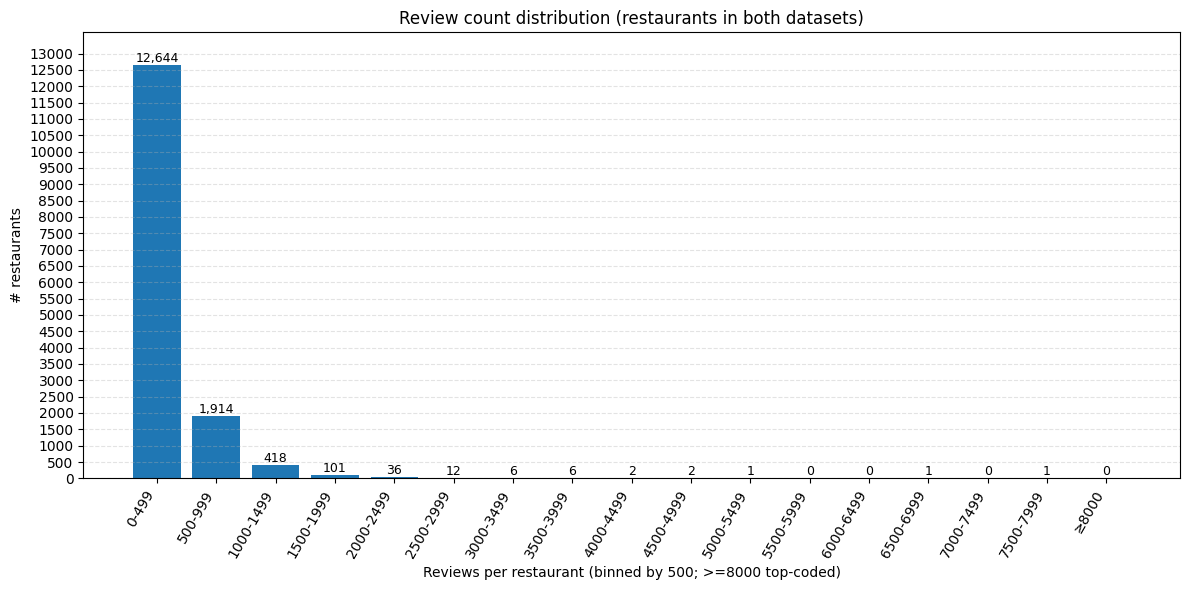

In [99]:

import matplotlib.pyplot as plt
import math
import numpy as np

BIN = 500
MAXCAP = 8000   # top-code: anything >=8000 goes into the last bin

dist_df = duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE LOWER(cat) LIKE '%restaurant%'
),
per_place AS (
  SELECT r.gmap_id, COUNT(*) AS review_rows
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_meta USING (gmap_id)
  GROUP BY r.gmap_id
),
counts AS (
  SELECT
    CASE
      WHEN review_rows >= {MAXCAP} THEN {MAXCAP}
      ELSE CAST(FLOOR(review_rows/{BIN}.0) * {BIN} AS INTEGER)
    END AS bin_lo,
    COUNT(*) AS n
  FROM per_place
  GROUP BY 1
),
bins AS (
  -- 0, 500, ..., 7500 plus a top-coded 8000 bin
  SELECT i*{BIN} AS bin_lo FROM range({MAXCAP//BIN}) t(i)
  UNION ALL
  SELECT {MAXCAP}
)
SELECT b.bin_lo, COALESCE(c.n, 0) AS n
FROM bins b
LEFT JOIN counts c USING (bin_lo)
ORDER BY b.bin_lo;
""").df()

labels = [("≥8000" if lo == MAXCAP else f"{lo}-{lo+BIN-1}") for lo in dist_df["bin_lo"]]


# plt.figure(figsize=(12,6))
# plt.bar(labels, dist_df["n"])

# ylim = int(math.ceil(dist_df["n"].max()/500.0))*500
# plt.ylim(0, max(500, ylim))
# plt.yticks(np.arange(0, ylim+1, 500))

# plt.xticks(rotation=60, ha='right')
# plt.xlabel('Reviews per restaurant (binned by 500; ≥8000 top-coded)')
# plt.ylabel('# restaurants')
# plt.title('Review count distribution (restaurants in both datasets)')
# plt.grid(axis='y', linestyle='--', alpha=0.35)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12,6))
bars = plt.bar(labels, dist_df["n"])

ylim = int(math.ceil(dist_df["n"].max()/500.0))*500
plt.ylim(0, max(500, ylim) + 0.05*ylim)
plt.yticks(np.arange(0, ylim+1, 500))

# put the counts on top of each bar
for rect in bars:
    h = rect.get_height()
    x = rect.get_x() + rect.get_width()/2
    plt.text(x, h, f"{int(h):,}", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=60, ha='right')
plt.xlabel('Reviews per restaurant (binned by 500; >=8000 top-coded)')
plt.ylabel('# restaurants')
plt.title('Review count distribution (restaurants in both datasets)')
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()



The Vast Majority: The overwhelming concentration is in the very first bin, 0−499 reviews. This bin contains 12,644 restaurants. The count drops off sharply with the next bin: 500−999 reviews contains only 1,914 restaurants.The number of restaurants quickly falls to the hundreds, then tens, and eventually singles, as the review count increases. If we perform a simple random sample on all restaurants, we'd likely select a very small sample of the high-volume restaurants (the "top" entities) or miss them entirely.



User degree = how many places that user reviewed (count of distinct gmap_id for that user_id)

In [59]:
duckdb.sql(f"""
WITH rest_places AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE REGEXP_MATCHES(TRIM(cat), '(?i)restaurant$')
),
per_user AS (
  SELECT r.user_id,
         COUNT(DISTINCT r.gmap_id) AS places_reviewed,  -- user degree
         COUNT(*)                  AS review_rows
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_places USING (gmap_id)
  WHERE r.user_id IS NOT NULL
  GROUP BY r.user_id
),
rk AS (
  SELECT *,
         ROW_NUMBER() OVER (ORDER BY places_reviewed DESC, user_id) AS r_top,
         ROW_NUMBER() OVER (ORDER BY places_reviewed ASC,  user_id) AS r_bot
  FROM per_user
)
SELECT 'top' AS which, user_id, places_reviewed, review_rows, r_top  AS rank
FROM rk WHERE r_top <= 5
UNION ALL
SELECT 'bottom', user_id, places_reviewed, review_rows, r_bot AS rank
FROM rk WHERE r_bot <= 5
ORDER BY which, rank;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,which,user_id,places_reviewed,review_rows,rank
0,bottom,100001429461215302221,1,1,1
1,bottom,100003843680123145108,1,1,2
2,bottom,100006882744403307812,1,1,3
3,bottom,100008284782701191770,1,1,4
4,bottom,100008831856703483353,1,1,5
5,top,112592323055633090757,405,405,1
6,top,115930839733864897214,384,392,2
7,top,108407421770671293628,382,390,3
8,top,108829914265472508916,345,345,4
9,top,101809599528434108038,344,350,5


In [66]:
duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE LOWER(cat) LIKE '%restaurant%'
),
per_user AS (
  SELECT
    r.user_id,
    COUNT(*)                  AS review_rows,       -- total review rows by this user on restaurants
    COUNT(DISTINCT r.gmap_id) AS places_reviewed    -- user degree (distinct restaurants)
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_meta USING (gmap_id)
  WHERE r.user_id IS NOT NULL
  GROUP BY r.user_id
)
SELECT
  COUNT(*)                                                   AS users_intersection,
  SUM(CASE WHEN review_rows > 50 THEN 1 ELSE 0 END)       AS users_reviews_gt_50,
  SUM(CASE WHEN review_rows <   5 THEN 1 ELSE 0 END)       AS users_reviews_lt_5
FROM per_user;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,users_intersection,users_reviews_gt_50,users_reviews_lt_5
0,329483,8029.0,64574.0


Total Reviews per User: How many reviews each user has written on restaurants.

Distinct Places per User: How many unique restaurants each user has reviewed.

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

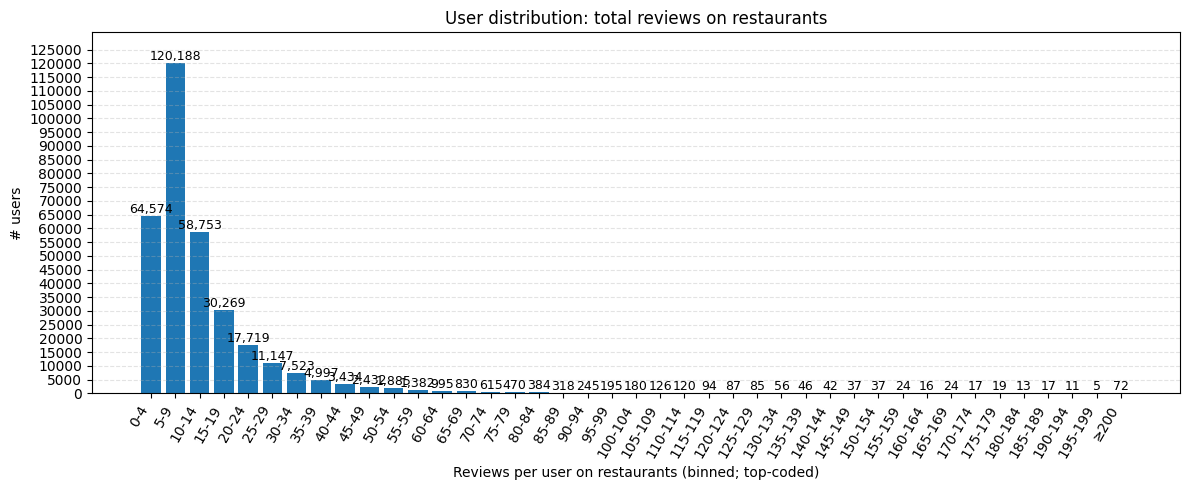

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

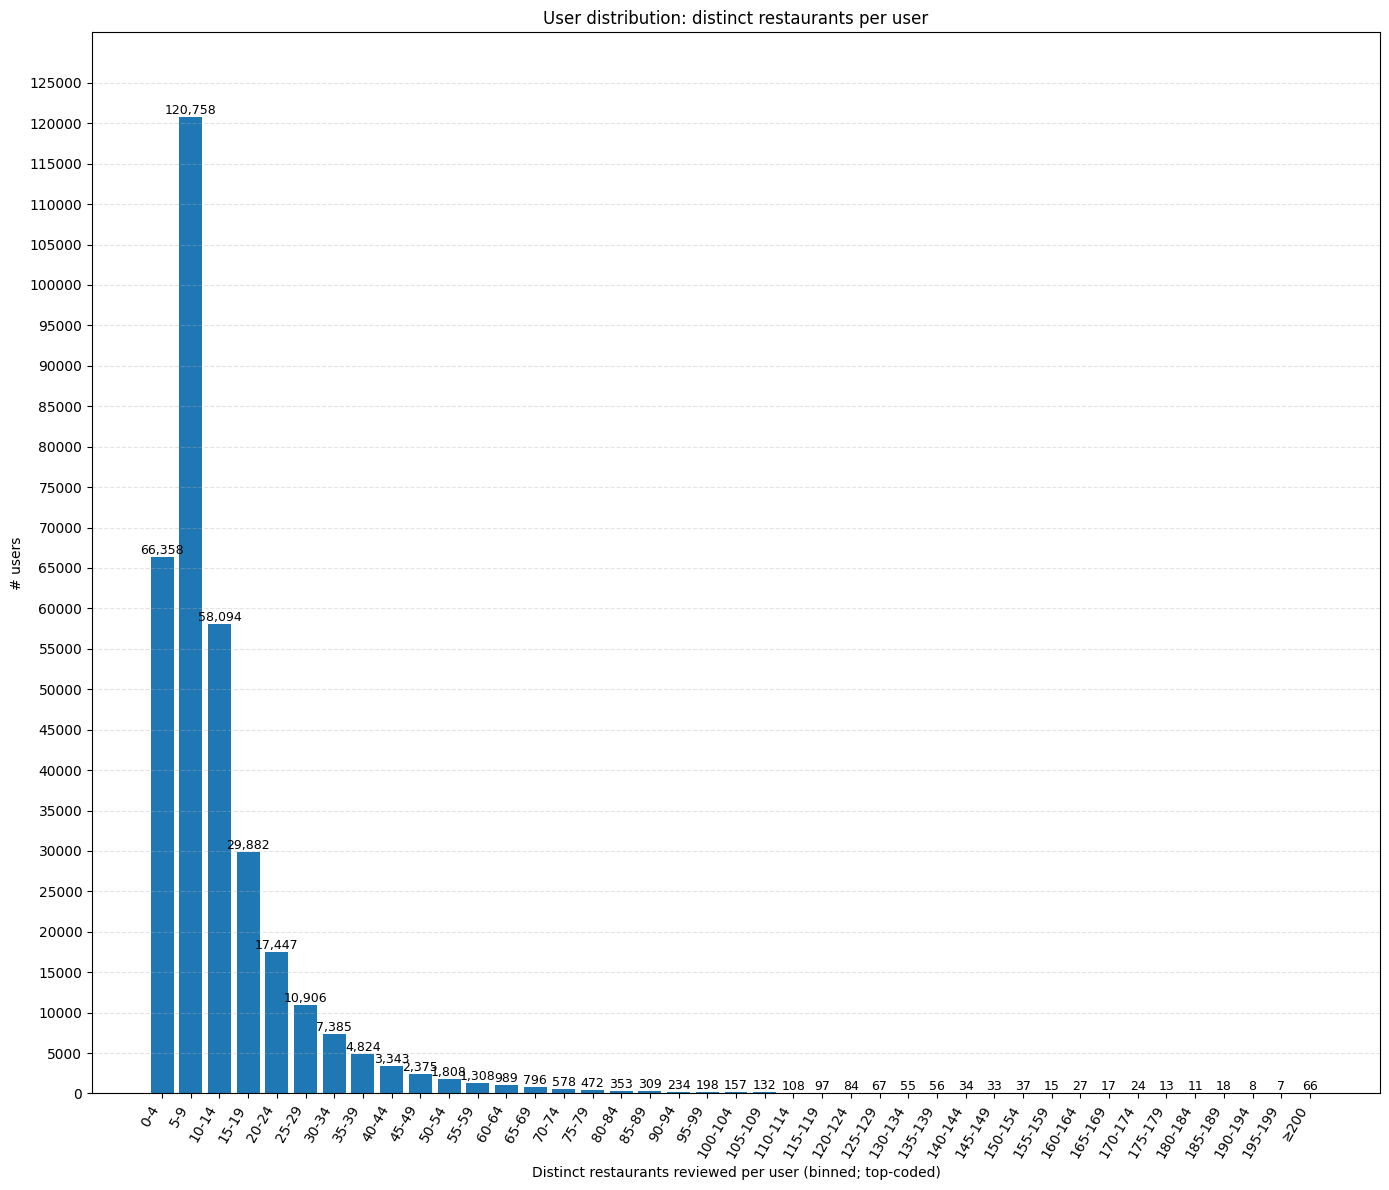

In [104]:
import duckdb, math, numpy as np, matplotlib.pyplot as plt

# knobs
BIN_U_REV  = 5      # bin width for total reviews per user
MAX_U_REV  = 200    # top-code threshold for total reviews per user
BIN_U_PL   = 5      # bin width for distinct places per user
MAX_U_PL   = 200    # top-code threshold for distinct places per user
YSTEP      = 5000   # y-axis tick step

# base CTEs used in both distributions
base_cte = f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE LOWER(cat) LIKE '%restaurant%'
),
per_user AS (
  SELECT
    r.user_id,
    COUNT(*)                   AS review_rows,       -- total review rows by this user on restaurants
    COUNT(DISTINCT r.gmap_id)  AS places_reviewed    -- user degree (distinct restaurants)
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_meta USING (gmap_id)
  WHERE r.user_id IS NOT NULL
  GROUP BY r.user_id
)
"""

# reviews-per-user distribution
dist_user_reviews = duckdb.sql(base_cte + f"""
, counts AS (
  SELECT
    CASE
      WHEN review_rows >= {MAX_U_REV} THEN {MAX_U_REV}
      ELSE CAST(FLOOR(review_rows/{BIN_U_REV}.0) * {BIN_U_REV} AS INTEGER)
    END AS bin_lo,
    COUNT(*) AS n
  FROM per_user
  GROUP BY 1
),
bins AS (
  SELECT i*{BIN_U_REV} AS bin_lo FROM range({MAX_U_REV//BIN_U_REV}) t(i)
  UNION ALL SELECT {MAX_U_REV}
)
SELECT b.bin_lo, COALESCE(c.n,0) AS n
FROM bins b LEFT JOIN counts c USING (bin_lo)
ORDER BY b.bin_lo;
""").df()

labels_reviews = [("≥"+str(MAX_U_REV) if lo == MAX_U_REV else f"{lo}-{lo+BIN_U_REV-1}")
                  for lo in dist_user_reviews["bin_lo"]]

plt.figure(figsize=(12,5))
bars = plt.bar(labels_reviews, dist_user_reviews["n"])
ylim = int(math.ceil(dist_user_reviews["n"].max()/YSTEP))*YSTEP
plt.ylim(0, max(YSTEP, ylim) + 0.05*max(YSTEP, ylim))
plt.yticks(np.arange(0, ylim+1, YSTEP))
for rect in bars:
    h = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, h, f"{int(h):,}", ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Reviews per user on restaurants (binned; top-coded)')
plt.ylabel('# users')
plt.title('User distribution: total reviews on restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()

# distinct-places-per-user distribution
dist_user_places = duckdb.sql(base_cte + f"""
, counts AS (
  SELECT
    CASE
      WHEN places_reviewed >= {MAX_U_PL} THEN {MAX_U_PL}
      ELSE CAST(FLOOR(places_reviewed/{BIN_U_PL}.0) * {BIN_U_PL} AS INTEGER)
    END AS bin_lo,
    COUNT(*) AS n
  FROM per_user
  GROUP BY 1
),
bins AS (
  SELECT i*{BIN_U_PL} AS bin_lo FROM range({MAX_U_PL//BIN_U_PL}) t(i)
  UNION ALL SELECT {MAX_U_PL}
)
SELECT b.bin_lo, COALESCE(c.n,0) AS n
FROM bins b LEFT JOIN counts c USING (bin_lo)
ORDER BY b.bin_lo;
""").df()

labels_places = [("≥"+str(MAX_U_PL) if lo == MAX_U_PL else f"{lo}-{lo+BIN_U_PL-1}")
                 for lo in dist_user_places["bin_lo"]]

plt.figure(figsize=(14,12))
bars = plt.bar(labels_places, dist_user_places["n"])
ylim = int(math.ceil(dist_user_places["n"].max()/YSTEP))*YSTEP
plt.ylim(0, max(YSTEP, ylim) + 0.05*max(YSTEP, ylim))
plt.yticks(np.arange(0, ylim+1, YSTEP))
for rect in bars:
    h = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, h, f"{int(h):,}", ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Distinct restaurants reviewed per user (binned; top-coded)')
plt.ylabel('# users')
plt.title('User distribution: distinct restaurants per user')
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


User Distribution of Total Reviews on Restaurants:

1. The Dominance of Low-Volume Reviewers

The vast majority of users are casual or one-time reviewers:

- The first bin, 0−4 reviews, contains the highest count: 120,188 users.

- The second bin, 5−9 reviews, is the second largest at 64,574 users.

- The third bin, 10−14 reviews, is third at 58,753 users.

These first three bins alone (users with 0 to 14 reviews) account for approximately 243,515 users, which is the bulk of the entire user population represented in the chart.

2. Rapid Drop-Off in Activity

The number of users quickly plummets as the review count increases:

- The count drops sharply from 58,753 (users with 10−14 reviews) to just 30,269 (users with 15−19 reviews).

- By the time you reach users with 50−54 reviews, the count is down to 3,997 users.

3. Scarcity of Power Reviewers

- Users who write a high volume of reviews—the "power reviewers"—are exceptionally rare:

- Beyond the 100−104 review bin, all subsequent bins contain fewer than 300 users.

- The top-coded bin, ≥200 reviews, contains only 72 users.

- These 72 users are the most active and highly influential reviewers in the entire dataset, yet they constitute a minuscule fraction of the total user base

User Distribution: Distinct Restaurants per User:

1. The Dominance of Single-Visit Reviewers

- The vast majority of users review a very limited number of distinct restaurants:

- The 0−4 distinct restaurants bin contains the highest count: 120,750 users. This group represents users who are highly selective or new to reviewing.

- The next two bins, 5−9 and 10−14 distinct restaurants, follow with 66,354 and 58,094 users, respectively.

2. Slower Drop-Off than Total Reviews

- Comparing this to the distribution of total reviews (where the count dropped to ≈30,000 users by the 15−19 bin), the drop-off here is slightly smoother in the middle range:

- The 15−19 bin has 29,882 users.

- The 20−24 bin has 17,347 users.

- The 25−29 bin has 10,906 users



Rating distribution for businesses:

 Comparing the distribution of the pre-calculated average ratings stored in the metadata file with the distribution of average ratings calculated directly from the individual review data. Both are grouped into 0.5-star bins.

 It checks for consistency between the pre-calculated average rating provided in the metadata file (meta_avg) and the average rating calculated directly from the individual review data (from_reviews).

In essence, it answers the question: "Does the average rating listed in the business metadata match the average rating we compute from the raw reviews?"

In [88]:
# rating distributions (restaurants present in BOTH datasets)
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

df = duckdb.sql(f"""
WITH rev_ids AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{json_path}', records=true)
  WHERE gmap_id IS NOT NULL
),
meta_rest AS (
  SELECT DISTINCT m.gmap_id, CAST(m.avg_rating AS DOUBLE) AS avg_rating
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE LOWER(cat) LIKE '%restaurant%'
),
ids AS (
  SELECT m.gmap_id
  FROM meta_rest m
  JOIN rev_ids r USING (gmap_id)
),

-- distribution from META avg_rating
meta_dist AS (
  SELECT 'meta_avg' AS source,
         ROUND(m.avg_rating*2,0)/2 AS rating_bin,
         COUNT(*) AS n
  FROM ids
  JOIN meta_rest m USING (gmap_id)
  WHERE m.avg_rating IS NOT NULL
  GROUP BY 1,2
),

-- distribution from REVIEWS (per-place mean)
place_means AS (
  SELECT r.gmap_id, AVG(CAST(r.rating AS DOUBLE)) AS mean_rating
  FROM read_json_auto('{json_path}', records=true) r
  JOIN ids USING (gmap_id)
  WHERE r.rating IS NOT NULL
  GROUP BY r.gmap_id
),
rev_dist AS (
  SELECT 'from_reviews' AS source,
         ROUND(mean_rating*2,0)/2 AS rating_bin,
         COUNT(*) AS n
  FROM place_means
  GROUP BY 1,2
)

SELECT * FROM meta_dist
UNION ALL
SELECT * FROM rev_dist
ORDER BY source, rating_bin;
""").df()

df


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,source,rating_bin,n
0,from_reviews,1.0,1
1,from_reviews,1.5,2
2,from_reviews,2.0,7
3,from_reviews,2.5,32
4,from_reviews,3.0,137
5,from_reviews,3.5,1212
6,from_reviews,4.0,5076
7,from_reviews,4.5,8123
8,from_reviews,5.0,554
9,meta_avg,1.5,4


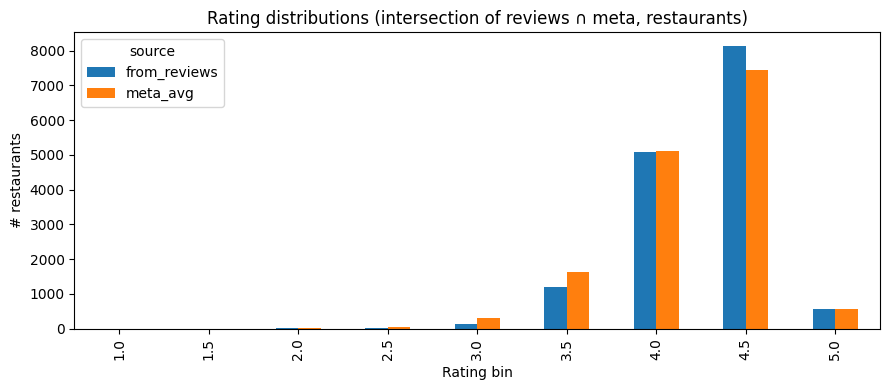

In [91]:
p = df.pivot(index='rating_bin', columns='source', values='n').fillna(0).sort_index()
ax = p.plot(kind='bar', figsize=(9,4))
ax.set_xlabel('Rating bin'); ax.set_ylabel('# restaurants')
ax.set_title('Rating distributions (intersection of reviews ∩ meta, restaurants)')
plt.tight_layout(); plt.show()


High Agreement and Positive Skew

- Overall Shape: Both distributions have the same overall shape: a strong positive skew, meaning most restaurants have high average ratings (≥4.0).

- Dominant Bins: The 4.5 rating bin is the largest for both sources, followed closely by the 4.0 and 3.5 bins. This is typical for online review platforms where users often select 5 or 4 stars.

- Consistency: The high degree of overlap confirms that the pre-calculated meta_avg is, for the most part, a valid and consistent representation of the average rating derived from the raw reviews (from_reviews)

- Discrepancy observed in the rating distributions (where from_reviews is slightly higher at the top bins and lower in the 3.5 bin than meta_avg)

- Possible reason - The average rating in the metadata (meta_avg) was likely calculated at an earlier time than the raw review data and some of the businesses improved or were rated higher later

Finding correlation between avg rating and other columns for restaurants (using share text - whether they have text reviews or not, share_responded - places which responded or not, n_users - aggregate of distinct users who reviewed the place and n-reviews - count of reviews, mean_response_days

In [77]:

duckdb.sql(f"""
-- 1) restaurant place ids (category contains 'restaurant')
CREATE OR REPLACE TEMP VIEW rest_places AS
SELECT DISTINCT m.gmap_id
FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
WHERE LOWER(cat) LIKE '%restaurant%';

-- 2) per-place aggregates from reviews (restricted to restaurant places)
CREATE OR REPLACE TEMP VIEW per_place_reviews AS
SELECT
  r.gmap_id,
  COUNT(*)                                      AS n_reviews,
  COUNT(DISTINCT r.user_id)                     AS n_users,
  AVG(CASE WHEN r.text IS NULL OR trim(r.text)='' THEN 0 ELSE 1 END) AS share_text,
  AVG(CASE WHEN r.resp.time IS NULL THEN 0 ELSE 1 END)               AS share_responded,
  AVG(
    CASE
      WHEN r.resp.time IS NULL THEN NULL
      ELSE DATEDIFF('hour', to_timestamp(r.time/1000.0), to_timestamp(r.resp.time/1000.0)) / 24.0
    END
  ) AS mean_response_days
FROM read_json_auto('{json_path}', records=true) r
JOIN rest_places USING (gmap_id)
GROUP BY r.gmap_id;

-- 3) add meta numbers to each place
CREATE OR REPLACE TEMP VIEW place_feat AS
SELECT
  p.*,
  CAST(m.avg_rating     AS DOUBLE) AS place_avg_rating_meta,
  CAST(m.num_of_reviews AS DOUBLE) AS place_review_count_meta
FROM per_place_reviews p
LEFT JOIN read_json_auto('{meta_path}', records=true, sample_size=-1) m USING (gmap_id);
""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

share_text                 0.203872
share_responded            0.073740
n_users                   -0.046624
n_reviews                 -0.045833
mean_response_days        -0.026416
place_review_count_meta   -0.021080
Name: place_avg_rating_meta, dtype: float64


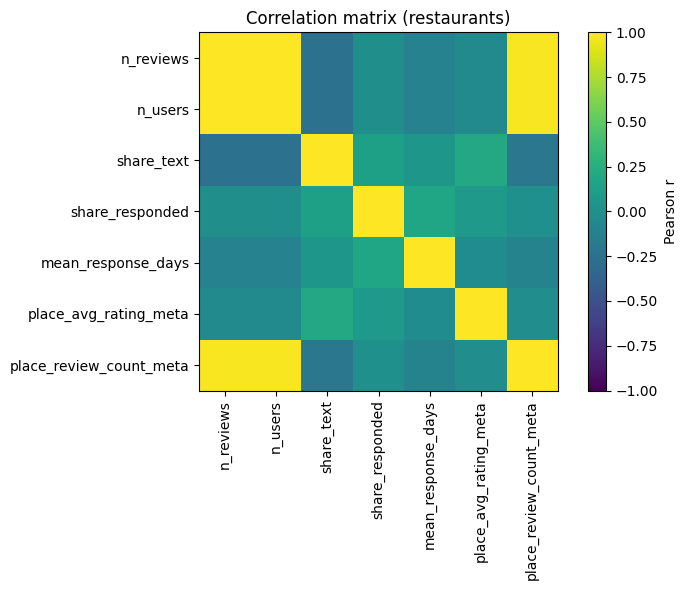

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

place = duckdb.sql("SELECT * FROM place_feat").df()
# keep numeric columns; convert bools to ints if any appear
num = place.select_dtypes(include=['number', 'bool']).copy()
for c in num.select_dtypes(include='bool').columns:
    num[c] = num[c].astype('int8')

# Pearson correlation matrix (pairwise NaN drop)
corr = num.corr(numeric_only=True, method='pearson')

# Show strongest correlations with the meta avg rating (our “target”)
target = 'place_avg_rating_meta'
if target in corr.columns:
    print(corr[target].drop(target).sort_values(key=np.abs, ascending=False).head(12))
else:
    print("Column place_avg_rating_meta not found. Available:", list(corr.columns))

# Heatmap (matplotlib only)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr.values, vmin=-1, vmax=1)
ax.set_xticks(range(len(corr.columns))); ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticks(range(len(corr.index)));  ax.set_yticklabels(corr.index)
fig.colorbar(im, ax=ax, label='Pearson r')
plt.title('Correlation matrix (restaurants)')
plt.tight_layout(); plt.show()


Findings -

Factors have weak linear correlation (|r| <= 0.2)

This heat map is a **Correlation Matrix** showing the **Pearson correlation coefficient ($r$)** between various aggregate statistics calculated for restaurants. It reveals the strength and direction of the linear relationship between every pair of variables.

The key to interpretation is the color bar on the right:
* **close to $+1.00$:** Strong positive correlation. As one variable increases, the other tends to increase.
* **close to $-1.00$:** Strong negative correlation. As one variable increases, the other tends to decrease.
* **close to $0.00$:** Weak or no linear correlation.


### 1. Measures of Business Volume

* **`n_reviews` vs. `n_users`:** **Very Strong Positive Correlation**
    * **Interpretation:** This is expected. Businesses that receive a high total number of reviews also tend to have a high number of unique users submitting those reviews. This shows review volume is driven by unique people, not just a few people submitting multiple reviews.
* **`n_reviews` vs. `place_review_count_meta`:** **Strong Positive
    * **Interpretation:** The number of reviews you calculated (`n_reviews`) correlates strongly with the review count listed in the metadata (`place_review_count_meta`). This validates the consistency of the review count metric between the two data sources.

### 2. Response Metrics

* **`n_reviews` vs. `share_responded`:** **Weak Positive Correlation**
    * **Interpretation:** Slightly more popular businesses (`n_reviews`) are *marginally* more likely to receive a response, but the relationship is weak. This suggests that the decision to respond is largely independent of a business's total review volume.
* **`share_responded` vs. `mean_response_days`:** **Weak Negative Correlation**
    * **Interpretation:** The likelihood of responding (`share_responded`) has almost no relationship with how long it takes to respond (`mean_response_days`). Businesses that respond often don't necessarily respond faster.

### 3. Response Time and Quality

* **`mean_response_days` vs. `share_text`:** **Weak Negative Correlation**
    * **Interpretation:** Businesses are slightly less likely to respond quickly to reviews that contain text. (Though this correlation is weak).
* **`mean_response_days` vs. `place_avg_rating_meta`:** **Weak Negative Correlation**
    * **Interpretation:** Faster response times are only slightly associated with higher average ratings.

### 4. Rating and Review Content

* **`share_text` vs. `place_avg_rating_meta`:** **Weak Negative Correlation**
    * **Interpretation:** Restaurants with higher average ratings are slightly less likely to receive reviews that contain text, or conversely, reviews with text are slightly more critical (pulling the average down).
* **`place_avg_rating_meta` vs. `n_reviews`:** **Weak Positive Correlation**
    * **Interpretation:** The business's average rating is largely independent of its popularity (total reviews). A high-volume business is not necessarily a high-rated business, and vice versa.


Review Volume and Average Rating aggregated across all years present in dataset, grouped by the calendar month.

In [112]:
duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE LOWER(cat) LIKE '%restaurant%'
)
SELECT
  CAST(MIN(EXTRACT(year FROM to_timestamp(r.time/1000.0))) AS INTEGER) AS min_year,
  CAST(MAX(EXTRACT(year FROM to_timestamp(r.time/1000.0))) AS INTEGER) AS max_year
FROM read_json_auto('{json_path}', records=true) r
JOIN rest_meta USING (gmap_id)
WHERE r.time IS NOT NULL
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,min_year,max_year
0,2002,2021


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

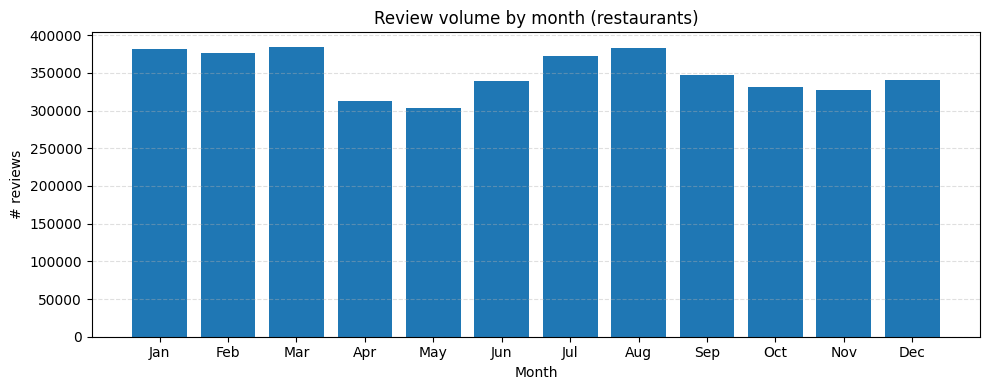

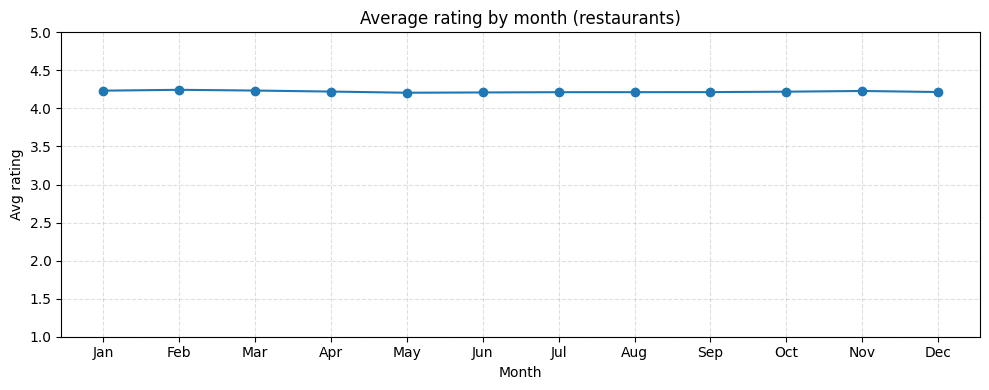

In [109]:
import matplotlib.pyplot as plt, calendar

moy = duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE LOWER(cat) LIKE '%restaurant%'
),
rev AS (
  SELECT
    CAST(EXTRACT(month FROM to_timestamp(r.time/1000.0)) AS INTEGER) AS m,
    CAST(r.rating AS DOUBLE) AS rating
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_meta USING (gmap_id)
  WHERE r.time IS NOT NULL AND r.rating IS NOT NULL
)
SELECT m,
       COUNT(*) AS n_reviews,
       AVG(rating) AS avg_rating
FROM rev
GROUP BY m
ORDER BY m;
""").df()

labels = [calendar.month_abbr[m] for m in moy["m"]]

plt.figure(figsize=(10,4))
plt.bar(labels, moy["n_reviews"])
plt.title("Review volume by month (restaurants)")
plt.xlabel("Month"); plt.ylabel("# reviews")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,4))
plt.plot(labels, moy["avg_rating"], marker='o')
plt.title("Average rating by month (restaurants)")
plt.xlabel("Month"); plt.ylabel("Avg rating")
plt.ylim(1,5); plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

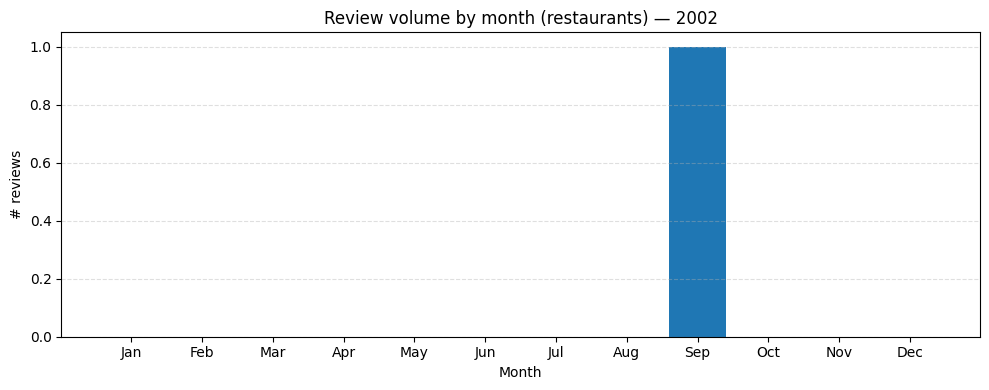

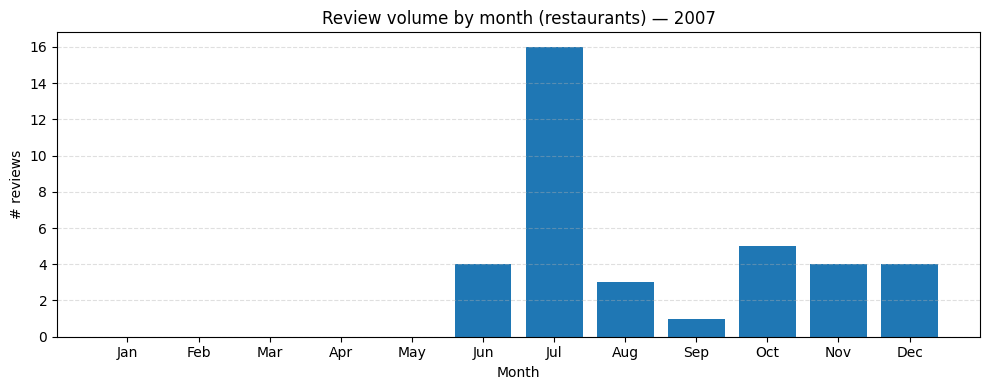

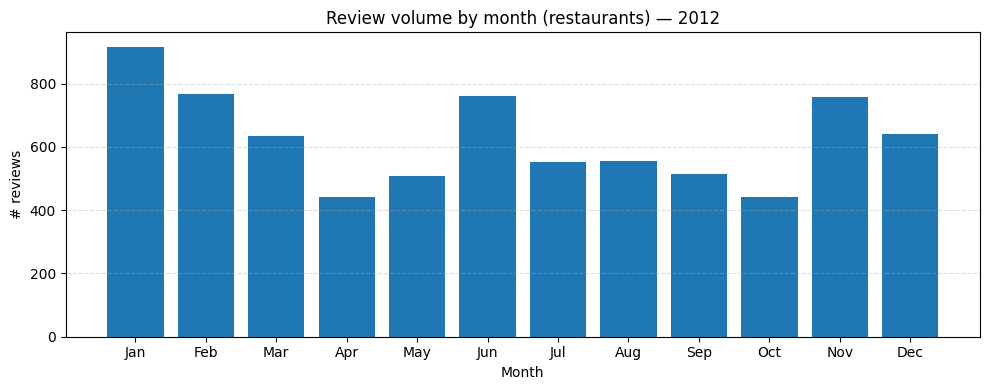

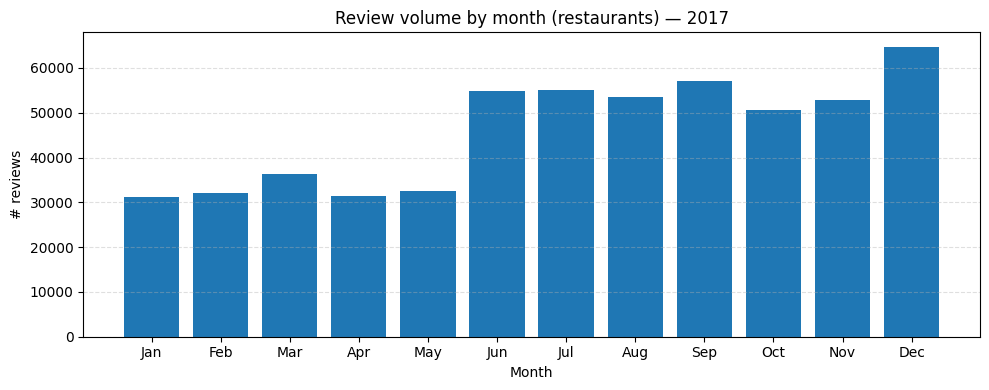

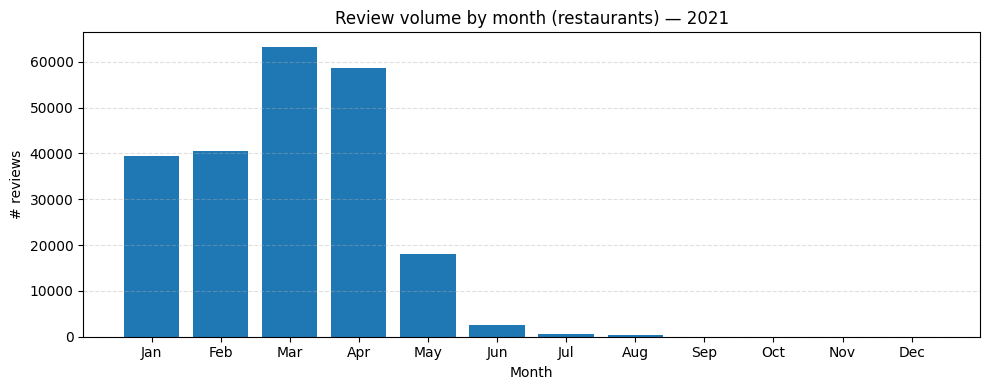

In [113]:
import matplotlib.pyplot as plt, calendar, pandas as pd

YEARS = [2002, 2007, 2012, 2017, 2021]

# Pull month stats for all requested years in one query
years_csv = ",".join(str(y) for y in YEARS)
moy_multi = duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE LOWER(cat) LIKE '%restaurant%'
),
rev AS (
  SELECT
    CAST(EXTRACT(year  FROM to_timestamp(r.time/1000.0)) AS INTEGER) AS y,
    CAST(EXTRACT(month FROM to_timestamp(r.time/1000.0)) AS INTEGER) AS m,
    CAST(r.rating AS DOUBLE) AS rating
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_meta USING (gmap_id)
  WHERE r.time IS NOT NULL AND r.rating IS NOT NULL
)
SELECT y, m,
       COUNT(*)    AS n_reviews,
       AVG(rating) AS avg_rating
FROM rev
WHERE y IN ({years_csv})
GROUP BY y, m
ORDER BY y, m;
""").df()

# Make one plot per year: volume by month
for Y in YEARS:
    dfy = (moy_multi[moy_multi['y'] == Y]
           .set_index('m')
           .reindex(range(1,13)))  # ensure all months
    labels = [calendar.month_abbr[m] for m in range(1,13)]

    plt.figure(figsize=(10,4))
    plt.bar(labels, dfy['n_reviews'].fillna(0))
    plt.title(f"Review volume by month (restaurants) — {Y}")
    plt.xlabel("Month"); plt.ylabel("# reviews")
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


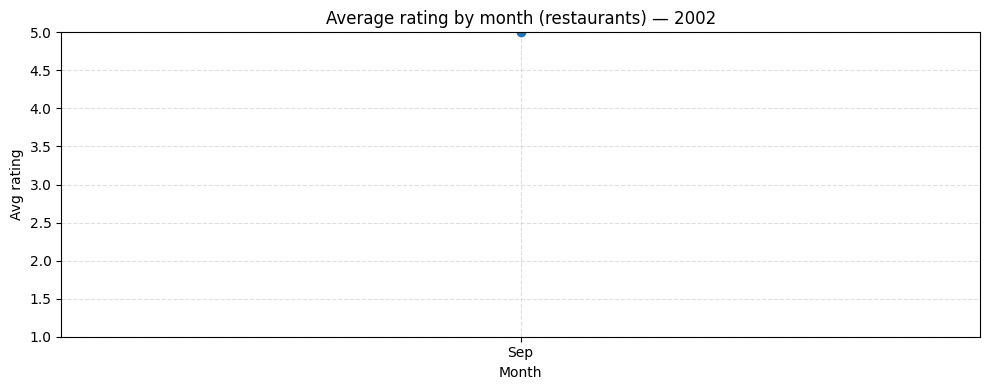

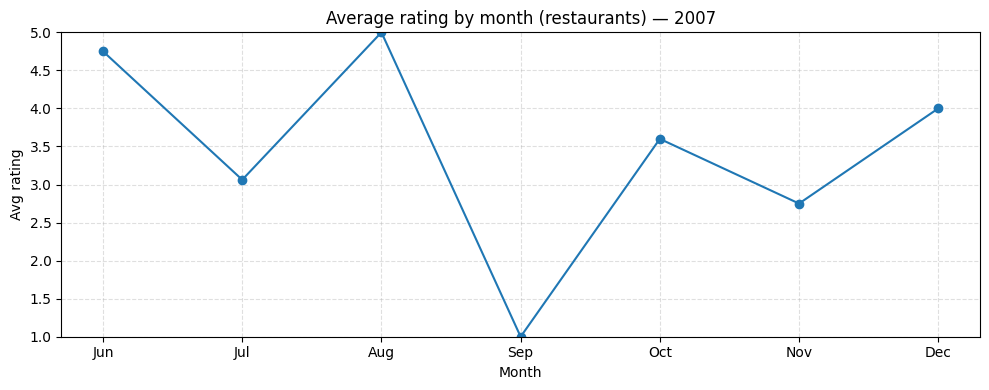

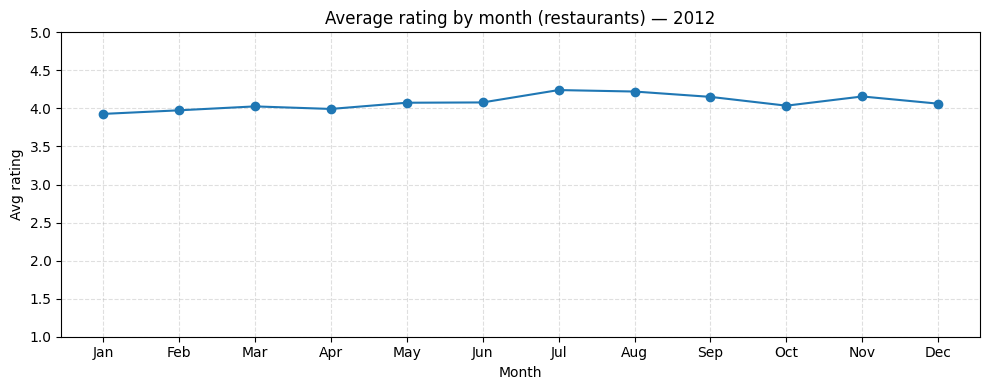

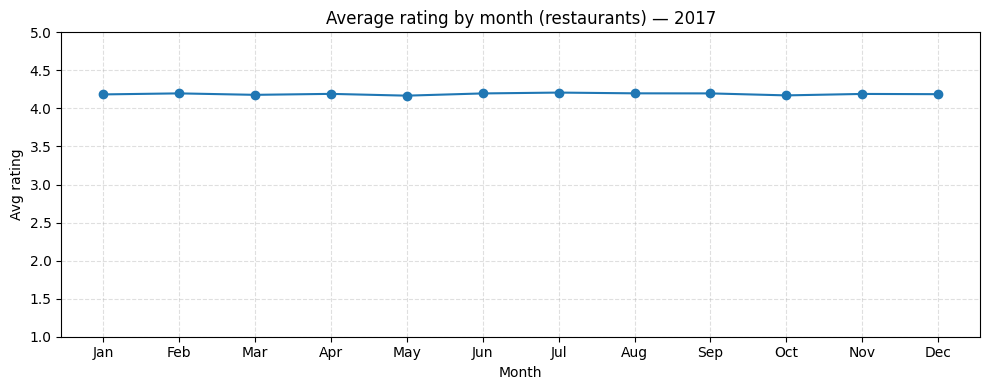

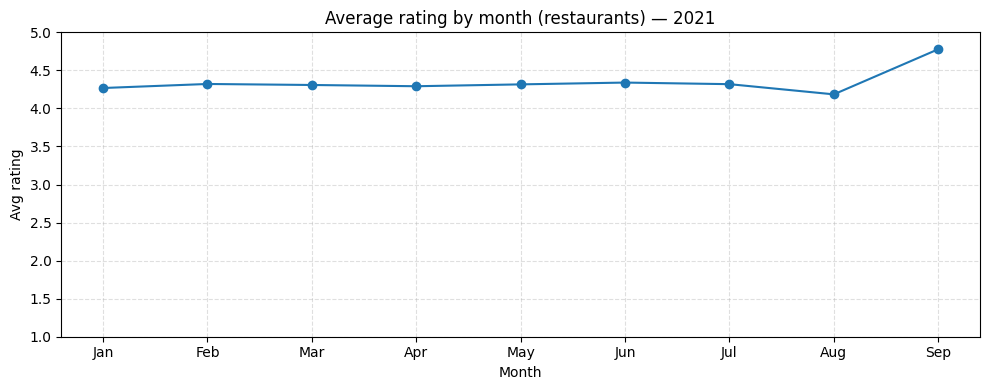

In [114]:
for Y in YEARS:
    dfy = (moy_multi[moy_multi['y'] == Y]
           .set_index('m')
           .reindex(range(1,13)))
    labels = [calendar.month_abbr[m] for m in range(1,13)]

    plt.figure(figsize=(10,4))
    plt.plot(labels, dfy['avg_rating'], marker='o')
    plt.title(f"Average rating by month (restaurants) — {Y}")
    plt.xlabel("Month"); plt.ylabel("Avg rating")
    plt.ylim(1,5); plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


- 2007 - more volatile
- 2012 - fluctuations exist
- 2017 - more stable



## Suggested Sampling Method: Stratified Random Sampling (by Review Volume)

The chart showing **Review Count Distribution** revealed that $\mathbf{12,644}$ restaurants are in the $0-499$ review bin, while only a handful are in the top bins. This massive imbalance means a simple random sample would be heavily biased towards low-volume restaurants.

### How to Stratify:

1.  **High-Volume Stratum (Top):** Sample all businesses with a large total review count (e.g., $\mathbf{\ge 2000 \text{ reviews}}$). These are the network hubs that drive overall statistics and must be included.
2.  **Mid-Volume Stratum (Typical):** Sample a smaller proportion (e.g., $\mathbf{5\%}$ to $\mathbf{10\%}$) of businesses in the middle range (e.g., $500-1999 \text{ reviews}$). These are the mature, typical establishments.
3.  **Low-Volume Stratum (Bottom):** Sample an even smaller proportion (e.g., $\mathbf{1\%}$ to $\mathbf{2\%}$) of businesses in the lowest bin (e.g., $0-499 \text{ reviews}$). This ensures you capture the baseline behavior and smaller, newer businesses without letting them dominate the sample size.

This method guarantees a **representative** set of high-impact businesses, leading to more **precise and generalizable** results than simple random sampling.

***

## Most Important Columns for Analysis

The most critical columns are those that allow you to capture the three dimensions of business success: **Popularity, Quality, and Engagement.**

| Column Category | Specific Columns | Why They Are Important |
| :--- | :--- | :--- |
| **1. Popularity/Volume** | $\mathbf{n\_reviews}$ | Measures the **reach** and market presence of the business. |
| | $\mathbf{n\_users}$ | Confirms that volume is driven by unique people, not spamming. |
| **2. Quality/Content** | $\mathbf{mean\_rating}$ (Calculated) | The primary measure of **product quality** and customer satisfaction. |
| | $\mathbf{share\_text}$ | A proxy for **review effort/salience**. Low ratings with text are often more informative. |
| **3. Engagement/Service** | $\mathbf{share\_responded}$ | Measures the business's **customer service effort** and engagement level. |
| | $\mathbf{mean\_response\_days}$ | Measures **service efficiency** (how quickly the business engages with feedback). |
| **4. Temporal Control** | $\mathbf{r.time}$ (Review Submission Time) | Essential for addressing the **temporal lag** observed in the rating distributions and for controlling for data maturity/volatility. |